In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'..', '..'))

from fn import _
from functional import seq

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from services import DataReader

y_row, X_row = zip(*DataReader().read_hmdb_diseases().items())

df_row = pd.DataFrame().from_records(X_row).T
df_row.columns = y_row

In [4]:
y_hmdb, X_hmdb = zip(*DataReader().read_json('../dataset/solutions/hmdb_averaging_disease_analysis.json').items())

dataset_bc = DataReader().read_analyze_solution('bc_averaging_disease_analysis#k=0')

In [5]:
X_bc_h, y_bc_h = zip(*filter(lambda x: x[1] == 'h', zip(*dataset_bc)))

In [6]:
X = X_hmdb + X_bc_h
y = y_hmdb + y_bc_h

In [7]:
from preprocessing import DynamicPreprocessing

pre = DynamicPreprocessing(['flux-diff', 'pathway-scoring', 'transport-elimination'])
X_pre = pre.fit_transform(X, y)

X_results, y_results = zip(*filter(lambda x: x[1] != 'h', zip(X_pre, y)))

In [8]:
name_of_analysis = lambda x: x.split('#')[0]
type_of_analysis = lambda x: x.split('#')[2]

In [9]:
black_list = ['uremia', 'heart transplant', 'hemodialysis']

In [10]:
dfs_by_types = (seq(X_results)
     .zip(y_results)
     .filter(lambda x: all(not x[1].startswith(i) for i in black_list))
     .group_by(lambda x: type_of_analysis(x[1]))
     .filter(lambda x: len(x[1]) >= 2)
     .map(lambda x: (x[0], list(zip(*x[1]))))
     .map(lambda x: (x[0], pd.DataFrame.from_records(x[1][0], index=x[1][1])))
     .map(lambda x: (x[0], x[1].groupby(name_of_analysis).mean().T))
     .to_dict())

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old),adpkd Adult (>18 years old),alzheimer's disease Adult (>18 years old),aminoaciduria Adult (>18 years old),eosinophilic esophagitis Children (1 - 13 years old),gastroesophageal reflux disease Children (1 - 13 years old),lung cancer Adult (>18 years old),maple syrup urine disease Adult (>18 years old),propionic acidemia Adult (>18 years old)
Alanine and aspartate metabolism_dif,307.837,342.236,564.681,533.111,-281.726,172.918,319.687,411.540,408.370
Alkaloid synthesis_dif,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
Aminosugar metabolism_dif,514.576,543.108,542.181,533.361,-83.972,532.703,540.099,317.914,318.323
Androgen and estrogen synthesis and metabolism_dif,0.000,-17.636,-17.595,-17.613,-0.000,-17.599,0.000,0.000,0.000
Arachidonic acid metabolism_dif,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000
Arginine and Proline Metabolism_dif,276.538,341.407,350.663,318.697,-135.158,386.439,334.891,175.751,172.513
Bile acid synthesis_dif,160.690,155.204,154.570,154.940,-2.403,150.827,150.848,121.920,120.333
Biotin metabolism_dif,502.886,521.629,511.460,499.430,-417.626,506.604,504.251,23.159,20.339
Blood group synthesis_dif,104.240,104.311,104.300,104.302,-0.000,104.298,104.310,61.345,61.344
Butanoate metabolism_dif,1188.111,1085.593,1093.009,1155.027,1585.859,631.825,1376.714,1009.775,999.878


,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old),adpkd Adult (>18 years old),alzheimer's disease Adult (>18 years old),aminoaciduria Adult (>18 years old),eosinophilic esophagitis Children (1 - 13 years old),gastroesophageal reflux disease Children (1 - 13 years old),lung cancer Adult (>18 years old),maple syrup urine disease Adult (>18 years old),propionic acidemia Adult (>18 years old)
3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old),0.000000,0.340822,0.197193,0.328384,0.910442,0.213543,0.048344,0.072546,0.071364
adpkd Adult (>18 years old),0.340822,0.000000,0.038548,0.016320,0.738267,0.075776,0.292197,0.520217,0.521460
alzheimer's disease Adult (>18 years old),0.197193,0.038548,0.000000,0.049470,0.810364,0.055809,0.153977,0.346014,0.347508
aminoaciduria Adult (>18 years old),0.328384,0.016320,0.049470,0.000000,0.730082,0.080672,0.313030,0.491731,0.492473
eosinophilic esophagitis Children (1 - 13 years old),0.910442,0.738267,0.810364,0.730082,0.000000,0.910928,0.849790,0.919521,0.923421
gastroesophageal reflux disease Children (1 - 13 years old),0.213543,0.075776,0.055809,0.080672,0.910928,0.000000,0.216047,0.362107,0.362081
lung cancer Adult (>18 years old),0.048344,0.292197,0.153977,0.313030,0.849790,0.216047,0.000000,0.132778,0.133380
maple syrup urine disease Adult (>18 years old),0.072546,0.520217,0.346014,0.491731,0.919521,0.362107,0.132778,0.000000,0.000307
propionic acidemia Adult (>18 years old),0.071364,0.521460,0.347508,0.492473,0.923421,0.362081,0.133380,0.000307,0.000000


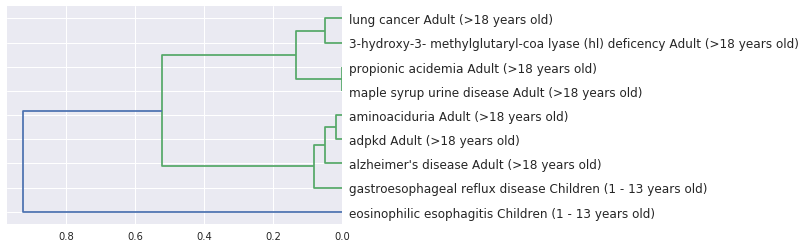

/opt/conda/lib/python3.5/site-packages/seaborn/matrix.py:603: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



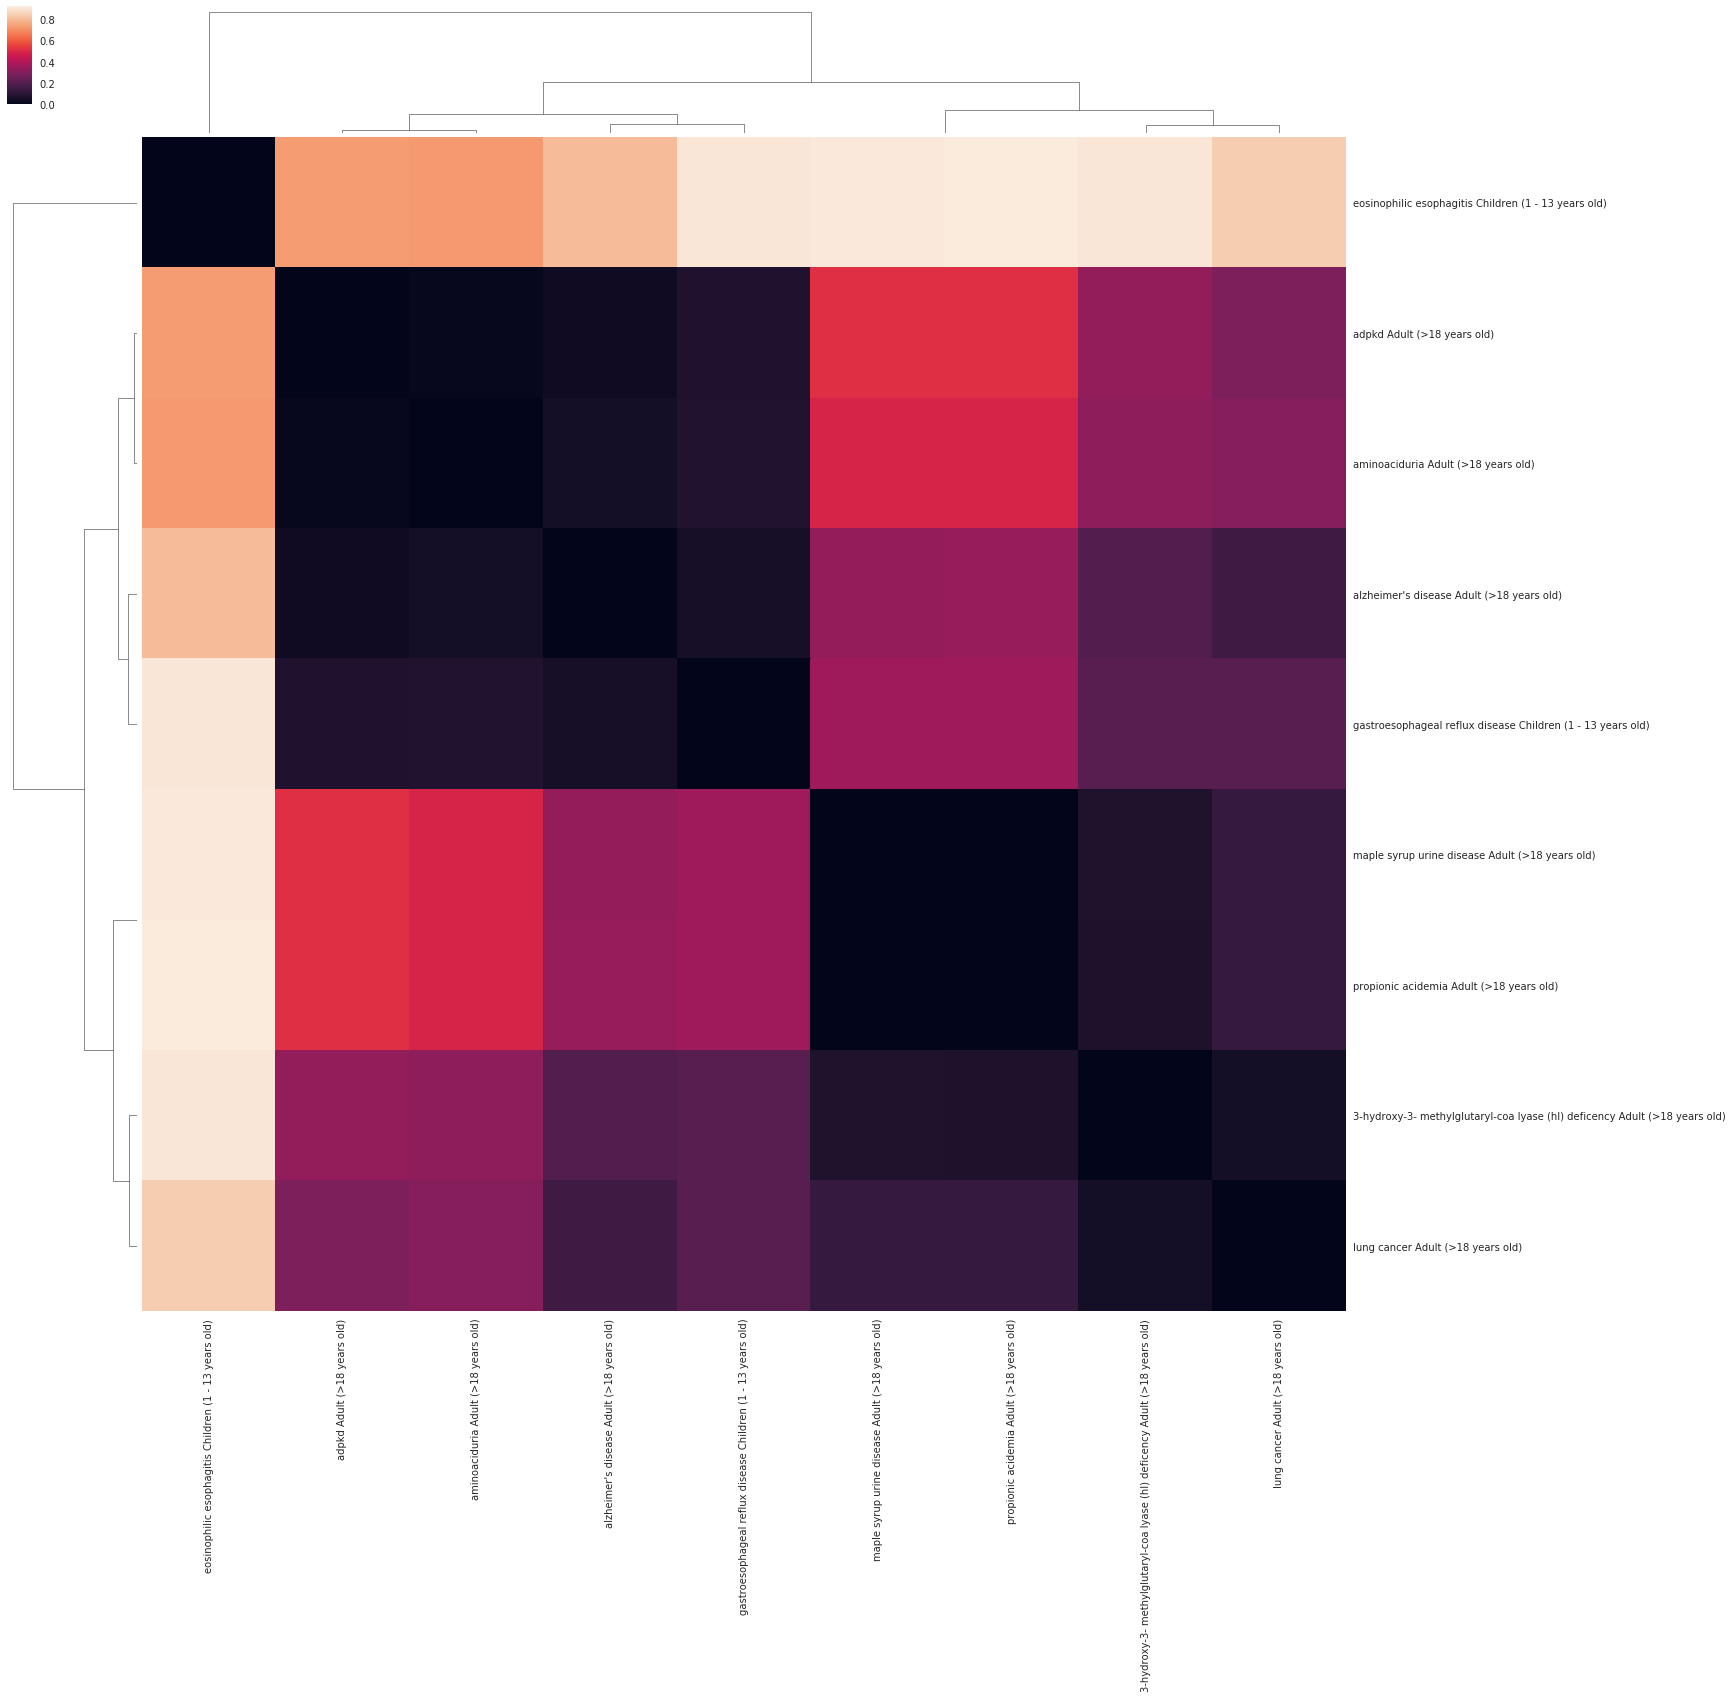

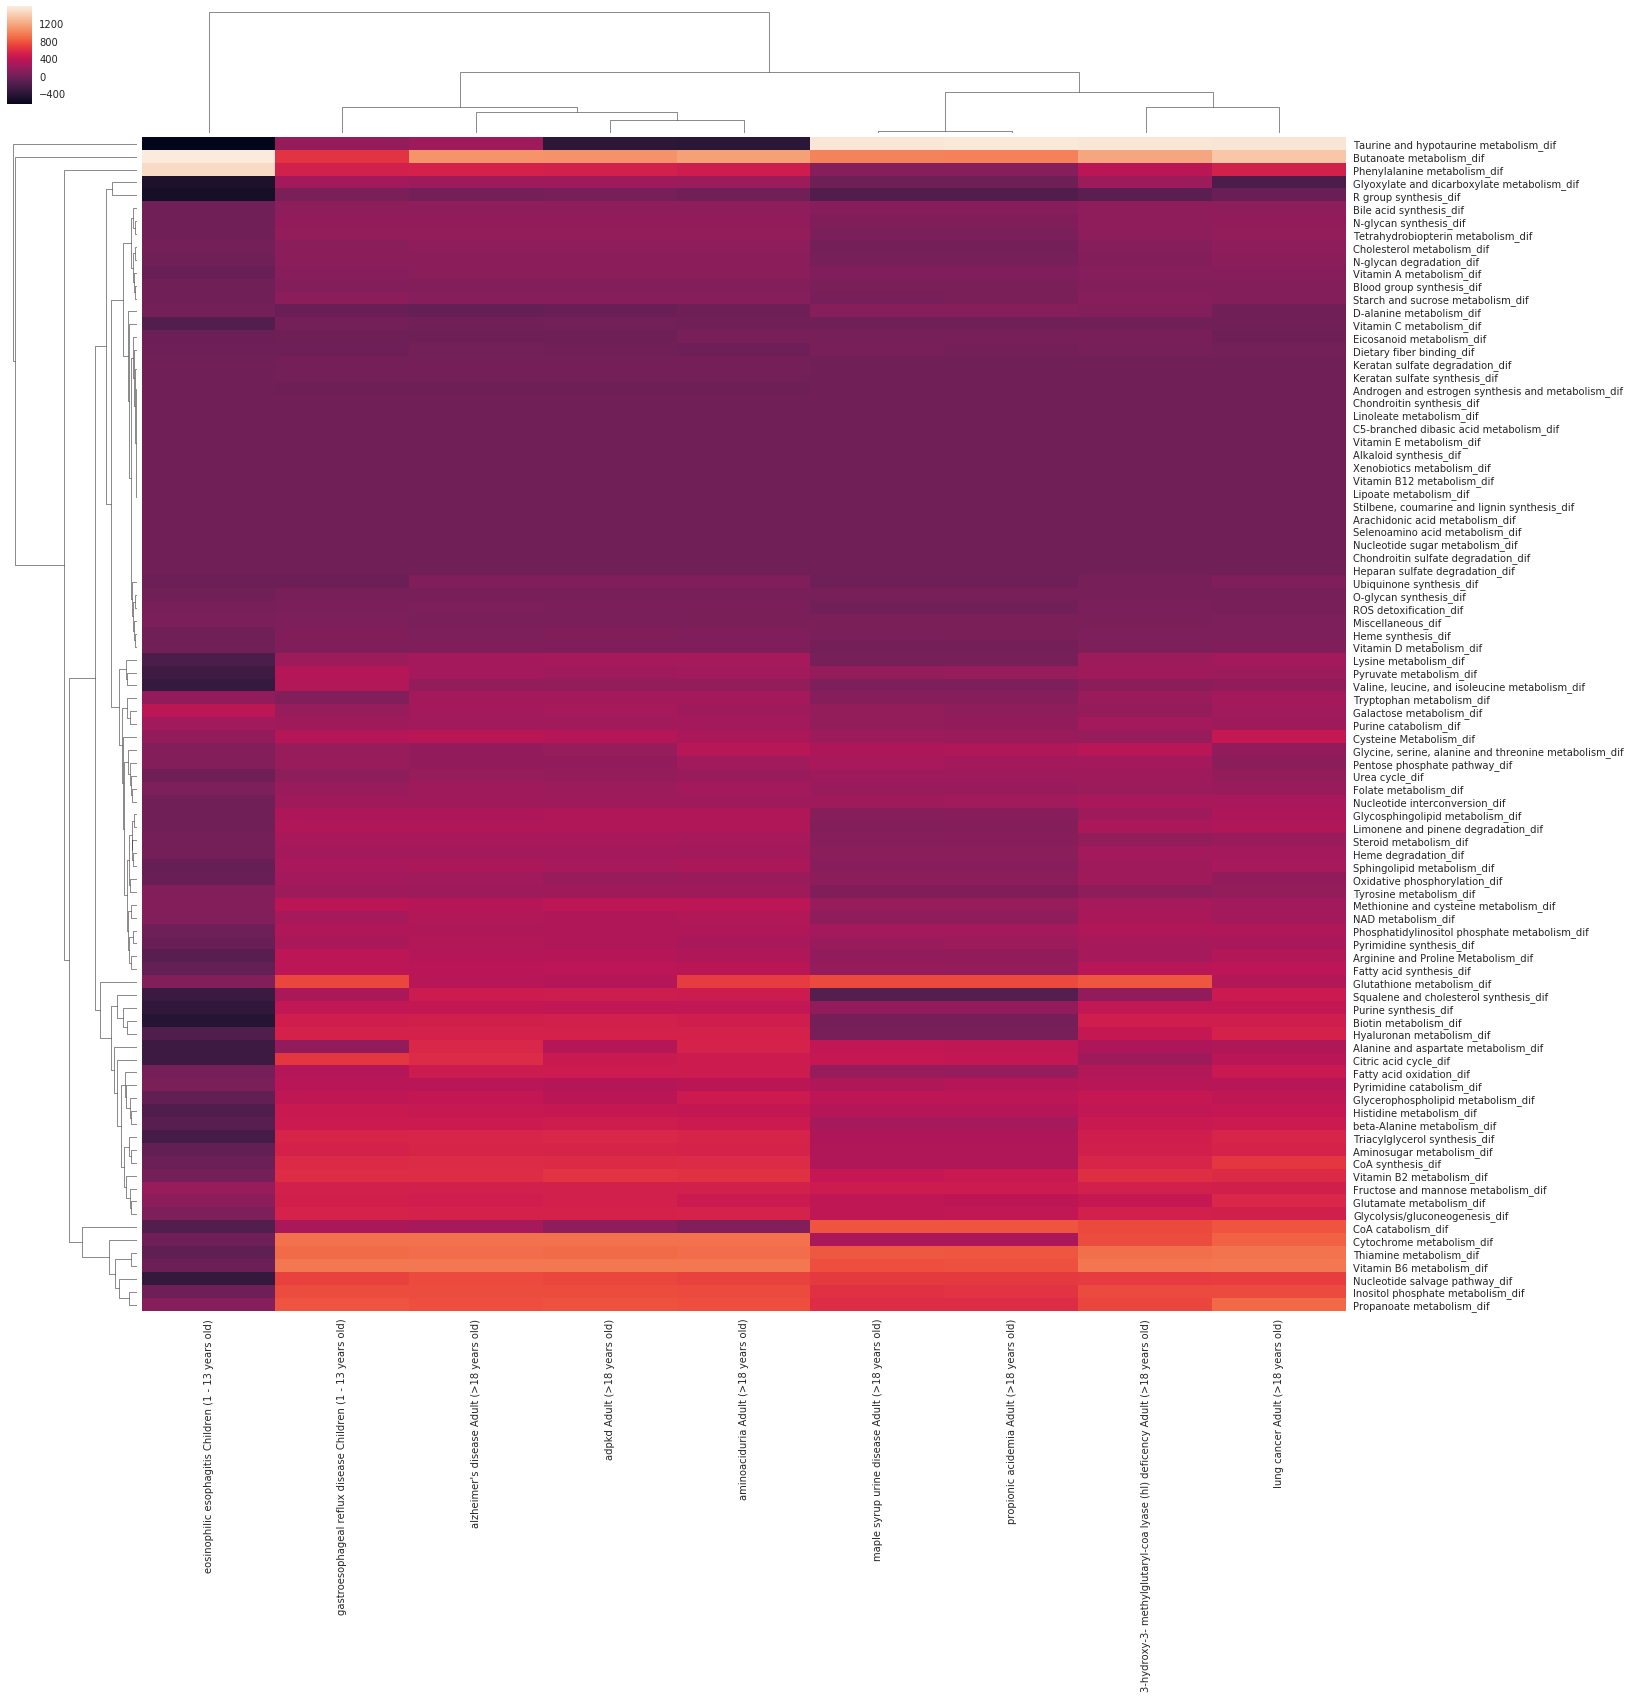

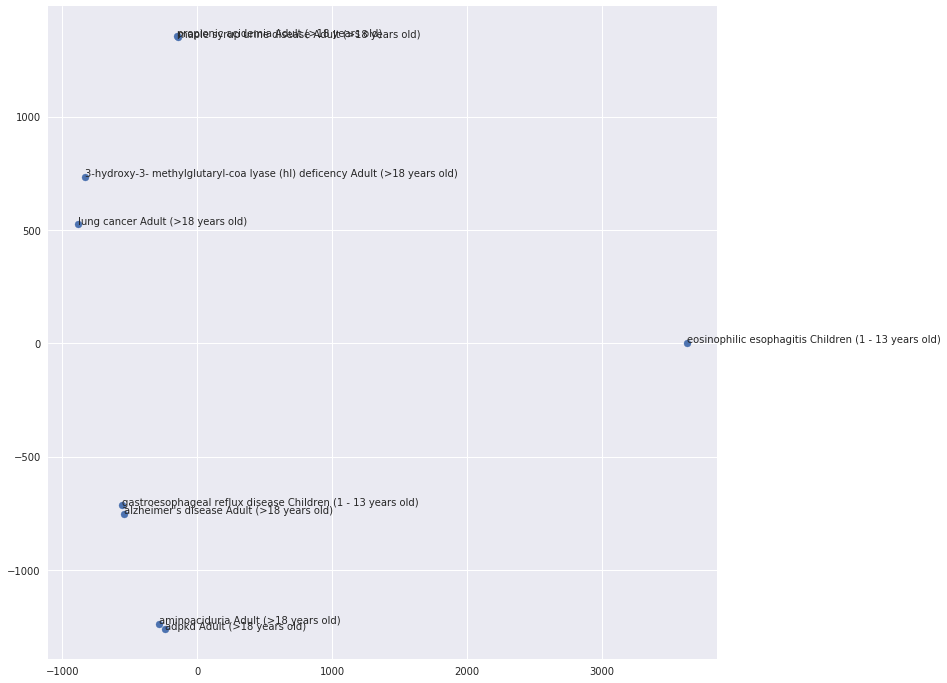

,canavan disease Adult (>18 years old),celiac disease Adult (>18 years old),cirrhosis Adult (>18 years old),diabetes Adult (>18 years old),epilepsy Adult (>18 years old),heart failure Adult (>18 years old),schizophrenia Adult (>18 years old)
Alanine and aspartate metabolism_dif,327.092,343.788,580.112,338.027,159.863,747.587,321.700
Alkaloid synthesis_dif,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
Aminosugar metabolism_dif,538.694,538.988,534.728,640.992,542.704,280.274,542.018
Androgen and estrogen synthesis and metabolism_dif,-17.624,-17.698,0.000,-17.590,-17.857,0.000,0.000
Arachidonic acid metabolism_dif,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
Arginine and Proline Metabolism_dif,345.886,349.381,472.118,306.938,307.009,61.059,318.255
Bile acid synthesis_dif,148.890,146.839,140.497,160.713,153.158,47.893,147.705
Biotin metabolism_dif,506.941,508.573,502.937,510.826,508.772,-146.612,509.099
Blood group synthesis_dif,104.307,104.315,104.276,-0.000,104.358,36.680,104.344
Butanoate metabolism_dif,1102.516,776.481,1057.650,2265.182,1128.138,692.444,1123.873


,canavan disease Adult (>18 years old),celiac disease Adult (>18 years old),cirrhosis Adult (>18 years old),diabetes Adult (>18 years old),epilepsy Adult (>18 years old),heart failure Adult (>18 years old),schizophrenia Adult (>18 years old)
canavan disease Adult (>18 years old),0.000000,0.034769,0.036684,0.115230,0.024067,0.555627,0.160882
celiac disease Adult (>18 years old),0.034769,0.000000,0.029810,0.158372,0.018714,0.583738,0.159567
cirrhosis Adult (>18 years old),0.036684,0.029810,0.000000,0.128678,0.032322,0.564199,0.159946
diabetes Adult (>18 years old),0.115230,0.158372,0.128678,0.000000,0.104665,0.613865,0.237726
epilepsy Adult (>18 years old),0.024067,0.018714,0.032322,0.104665,0.000000,0.592895,0.148429
heart failure Adult (>18 years old),0.555627,0.583738,0.564199,0.613865,0.592895,0.000000,0.266115
schizophrenia Adult (>18 years old),0.160882,0.159567,0.159946,0.237726,0.148429,0.266115,0.000000


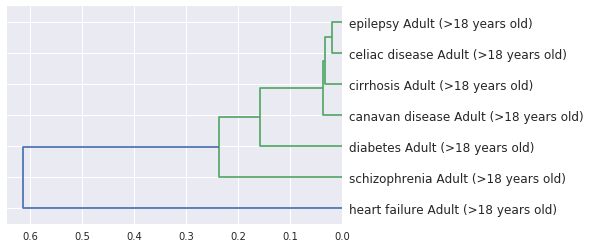

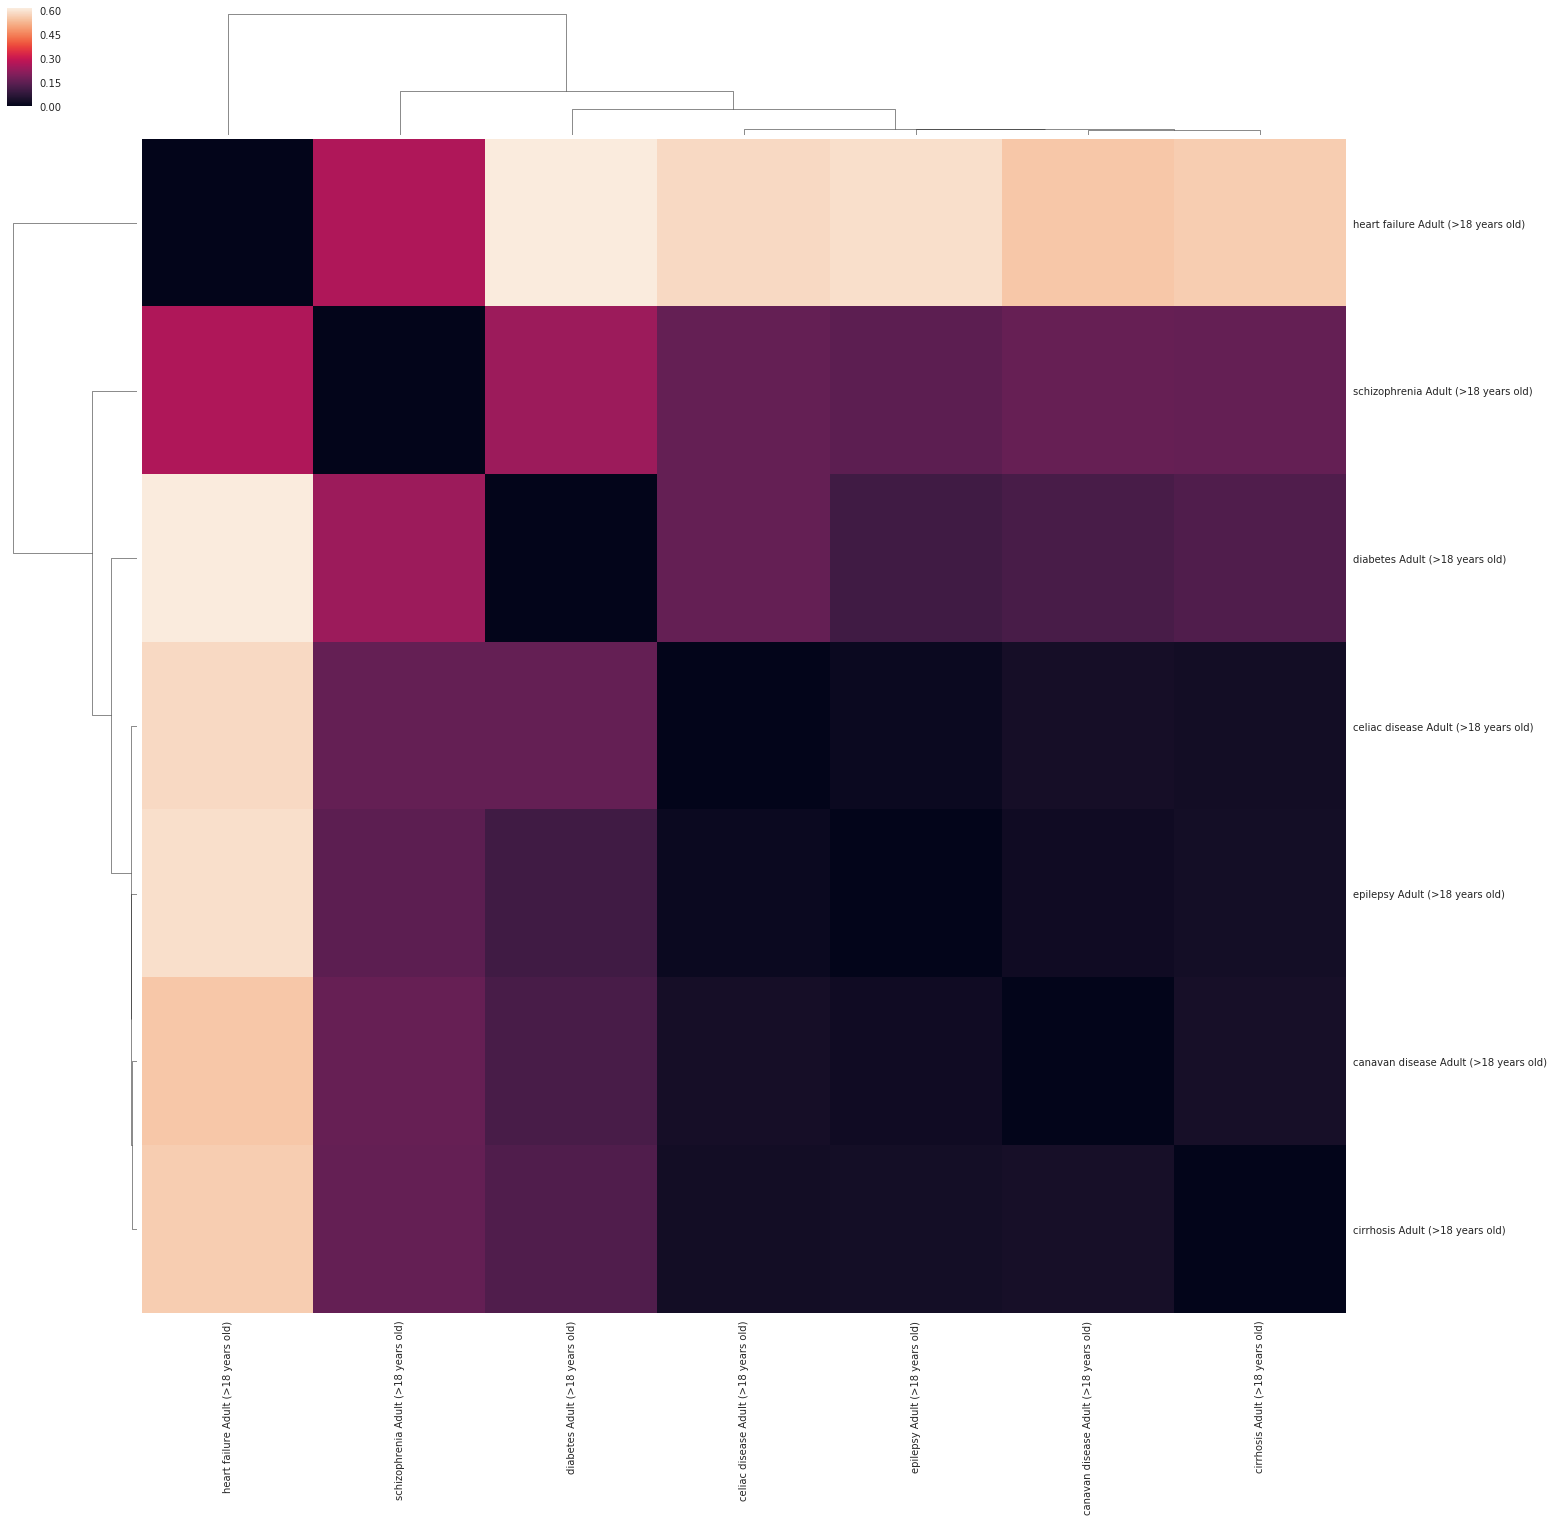

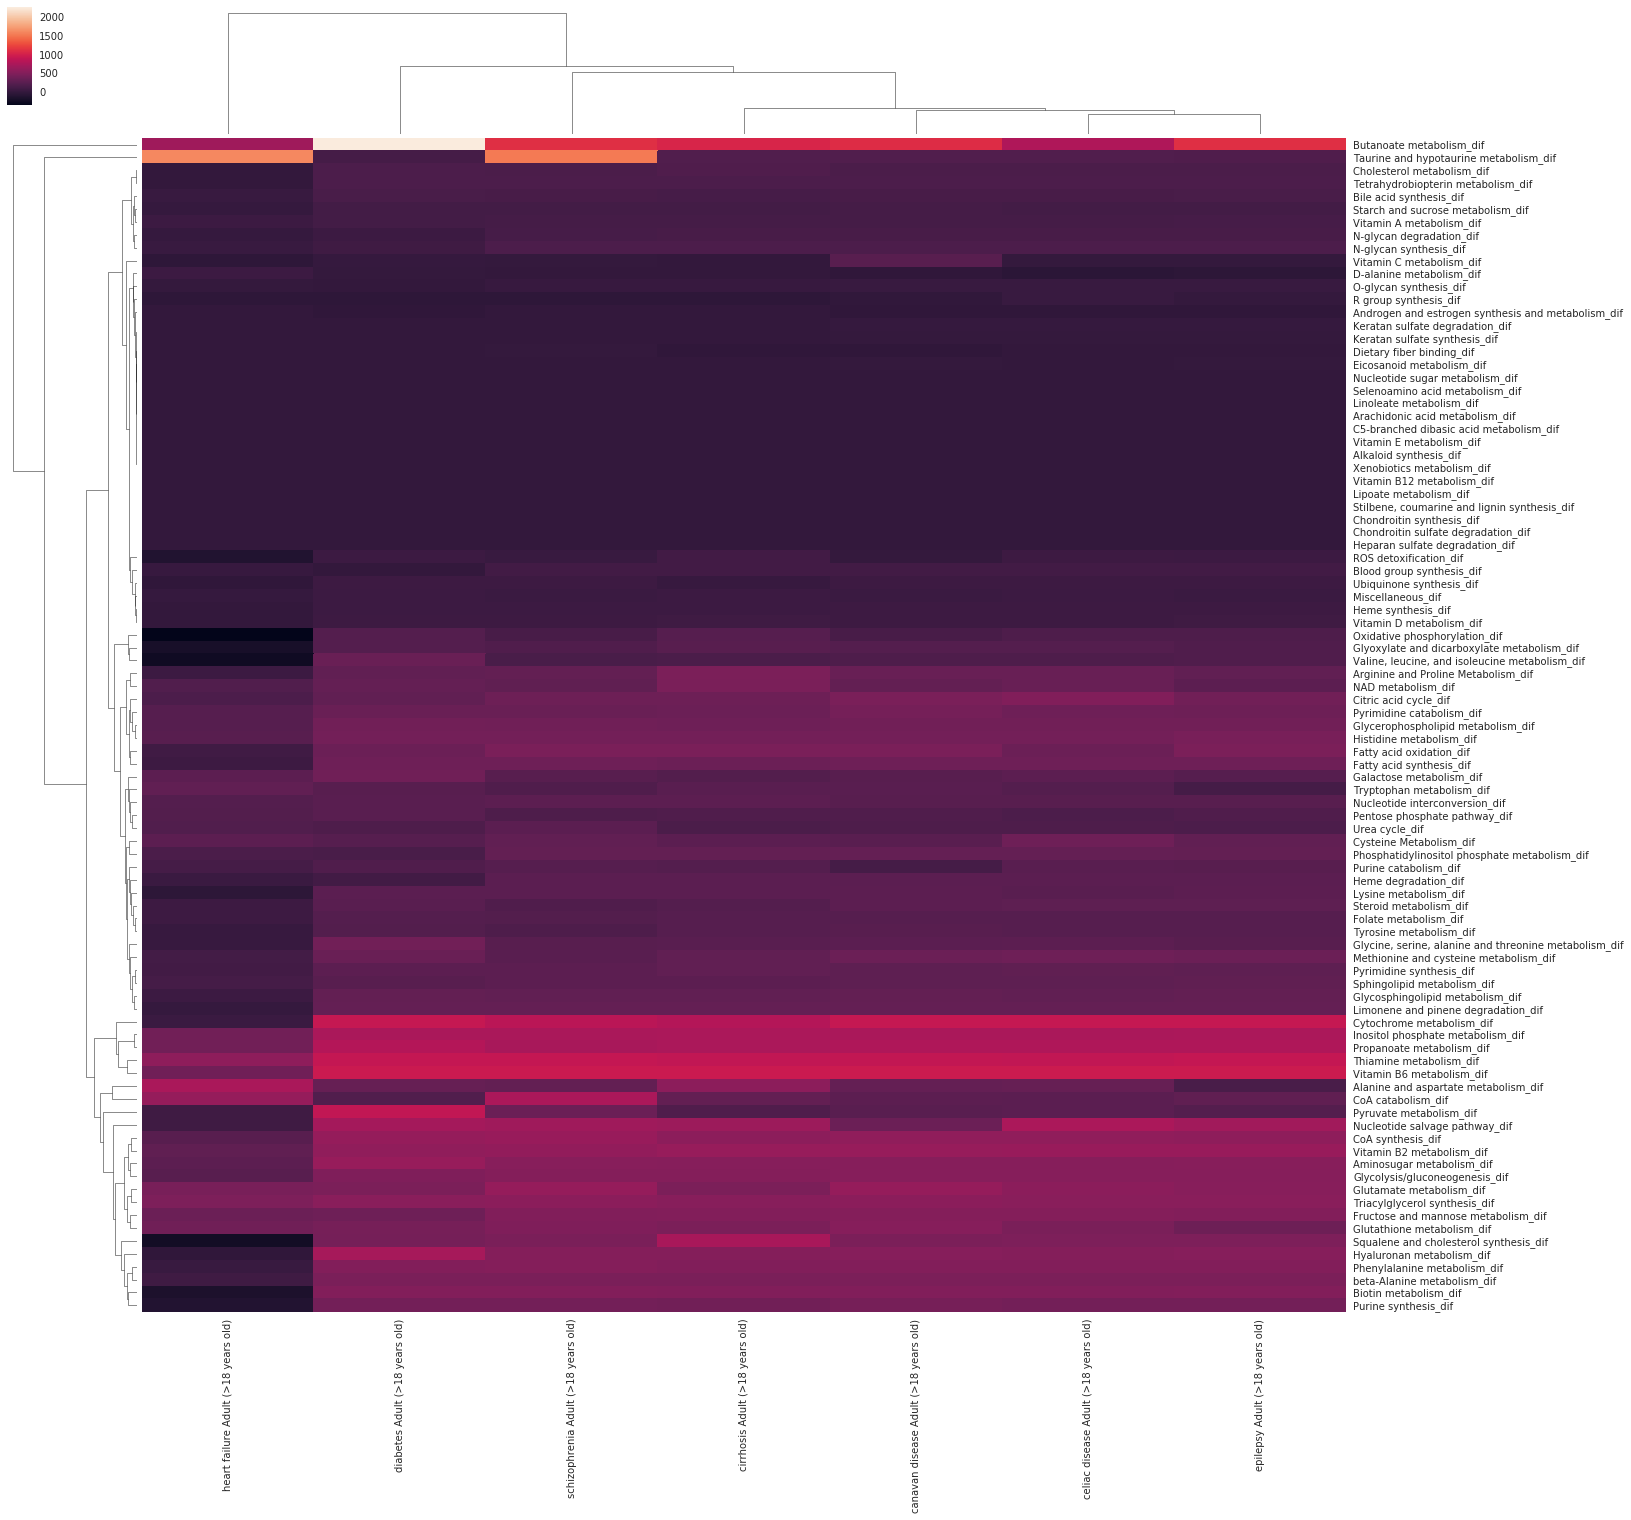

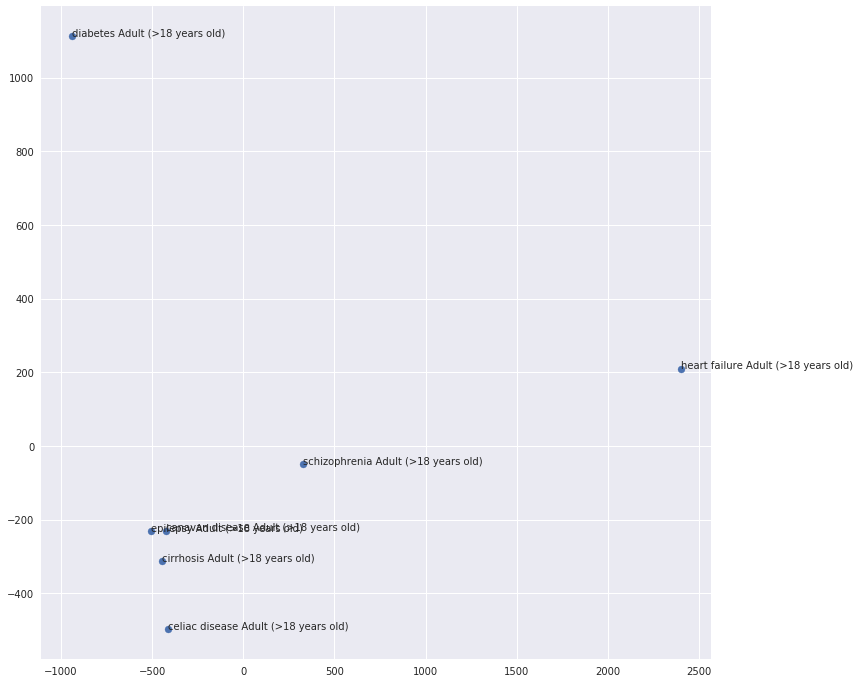

,alzheimer's disease Adult (>18 years old),frontotemporal lobe dementia Adult (>18 years old),lewy body disease Adult (>18 years old)
Alanine and aspartate metabolism_dif,607.936,232.486,307.888
Alkaloid synthesis_dif,-0.000,-0.000,-0.000
Aminosugar metabolism_dif,63.970,136.622,309.713
Androgen and estrogen synthesis and metabolism_dif,0.000,0.000,0.000
Arachidonic acid metabolism_dif,-0.000,-0.000,-0.000
Arginine and Proline Metabolism_dif,141.987,-60.157,205.241
Bile acid synthesis_dif,40.428,17.710,50.353
Biotin metabolism_dif,-416.137,-401.500,-410.945
Blood group synthesis_dif,-0.000,0.000,-0.000
Butanoate metabolism_dif,-413.700,53.781,-416.597


,alzheimer's disease Adult (>18 years old),frontotemporal lobe dementia Adult (>18 years old),lewy body disease Adult (>18 years old)
alzheimer's disease Adult (>18 years old),0.000000,0.180241,0.421001
frontotemporal lobe dementia Adult (>18 years old),0.180241,0.000000,0.326759
lewy body disease Adult (>18 years old),0.421001,0.326759,0.000000


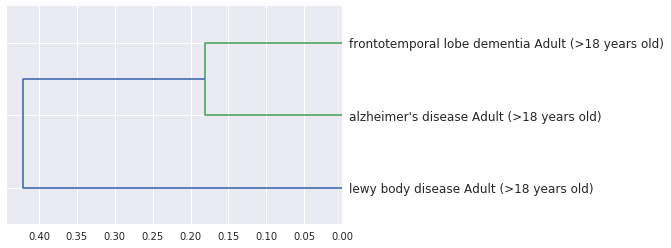

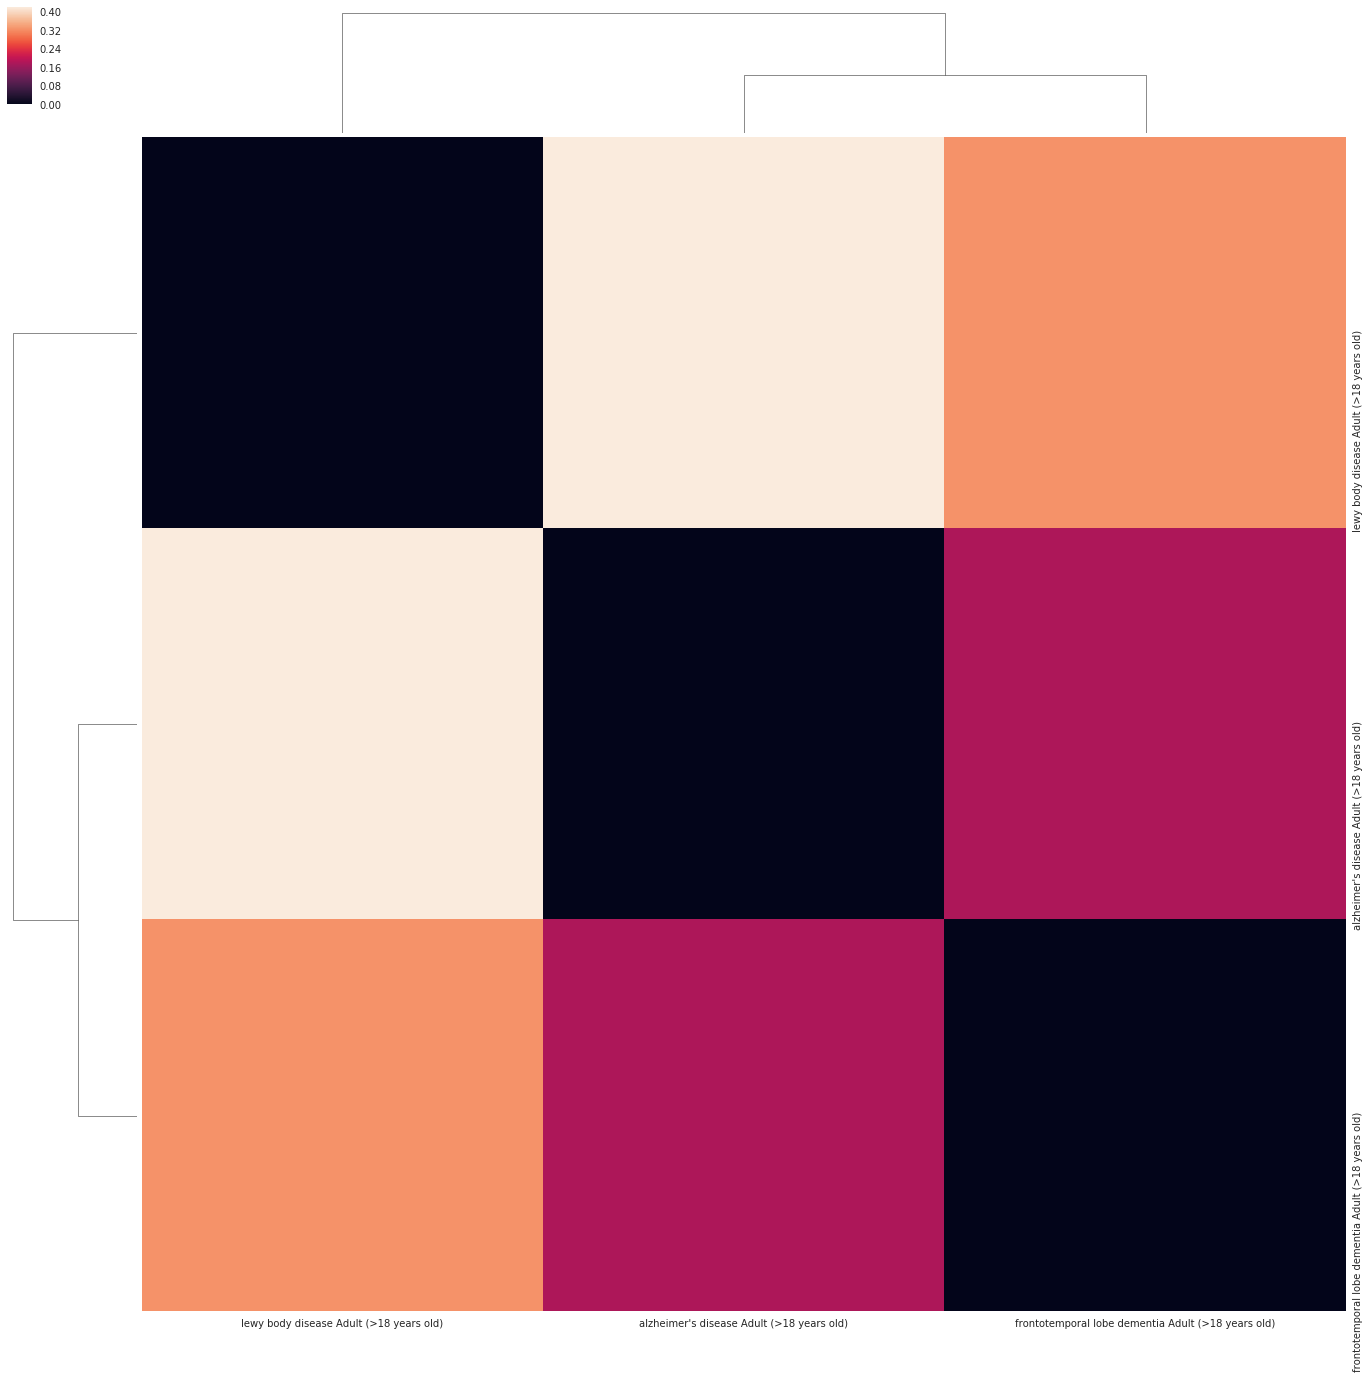

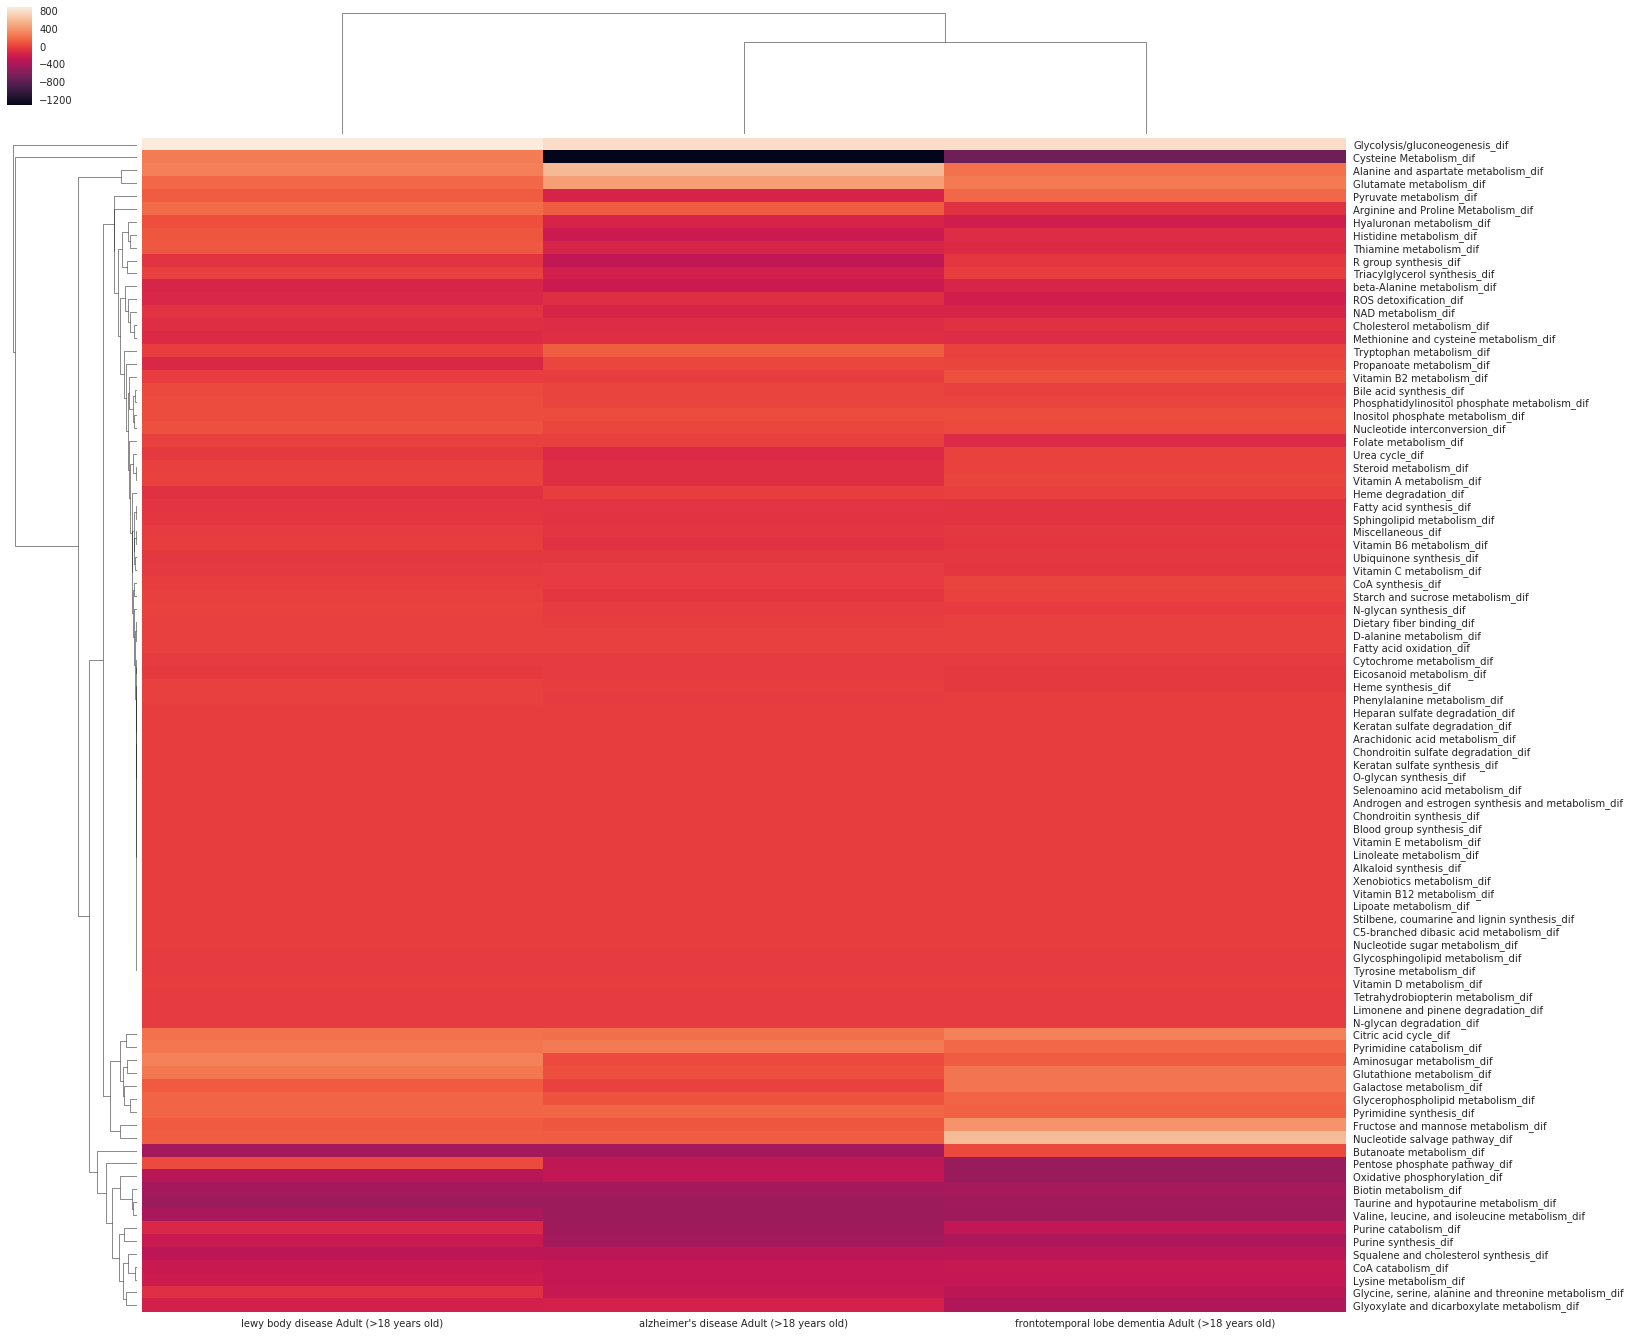

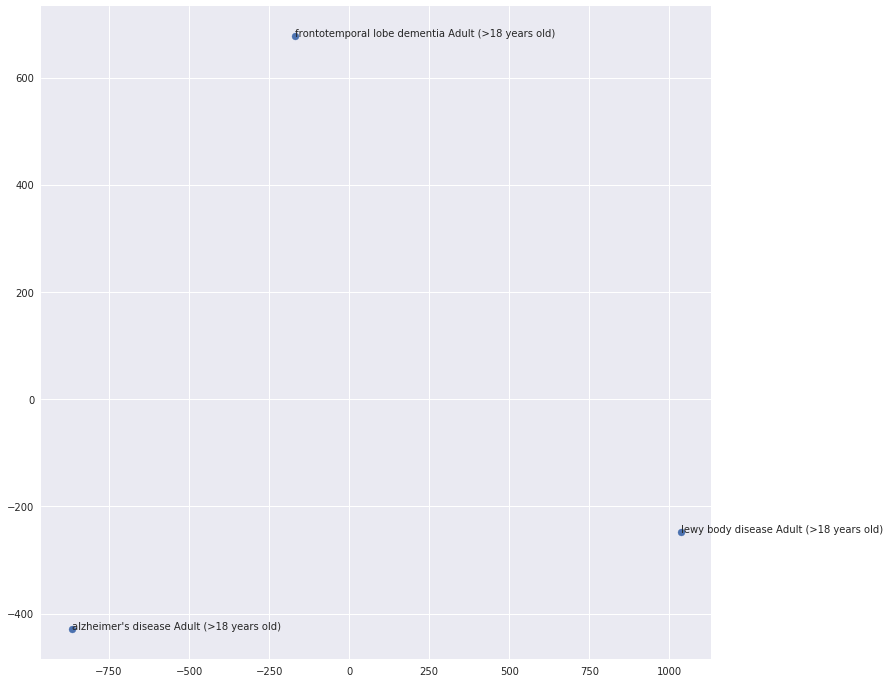

,alzheimer's disease Adult (>18 years old),meningitis Adult (>18 years old),schizophrenia Adult (>18 years old)
Alanine and aspartate metabolism_dif,246.103,449.623,436.413
Alkaloid synthesis_dif,-0.000,-0.000,-0.000
Aminosugar metabolism_dif,541.631,539.861,540.574
Androgen and estrogen synthesis and metabolism_dif,-17.645,-17.654,-17.625
Arachidonic acid metabolism_dif,-0.000,-0.000,-0.000
Arginine and Proline Metabolism_dif,364.891,393.378,470.324
Bile acid synthesis_dif,148.466,139.248,147.102
Biotin metabolism_dif,512.077,520.443,515.301
Blood group synthesis_dif,104.443,104.284,104.347
Butanoate metabolism_dif,1086.282,2288.251,1101.008


,alzheimer's disease Adult (>18 years old),meningitis Adult (>18 years old),schizophrenia Adult (>18 years old)
alzheimer's disease Adult (>18 years old),0.000000,0.086221,0.046760
meningitis Adult (>18 years old),0.086221,0.000000,0.118518
schizophrenia Adult (>18 years old),0.046760,0.118518,0.000000


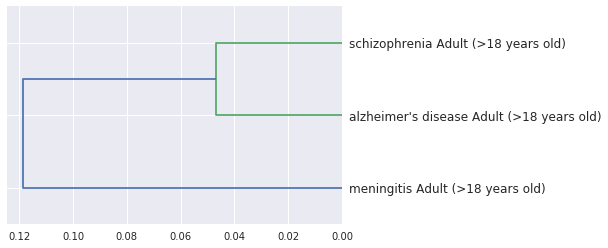

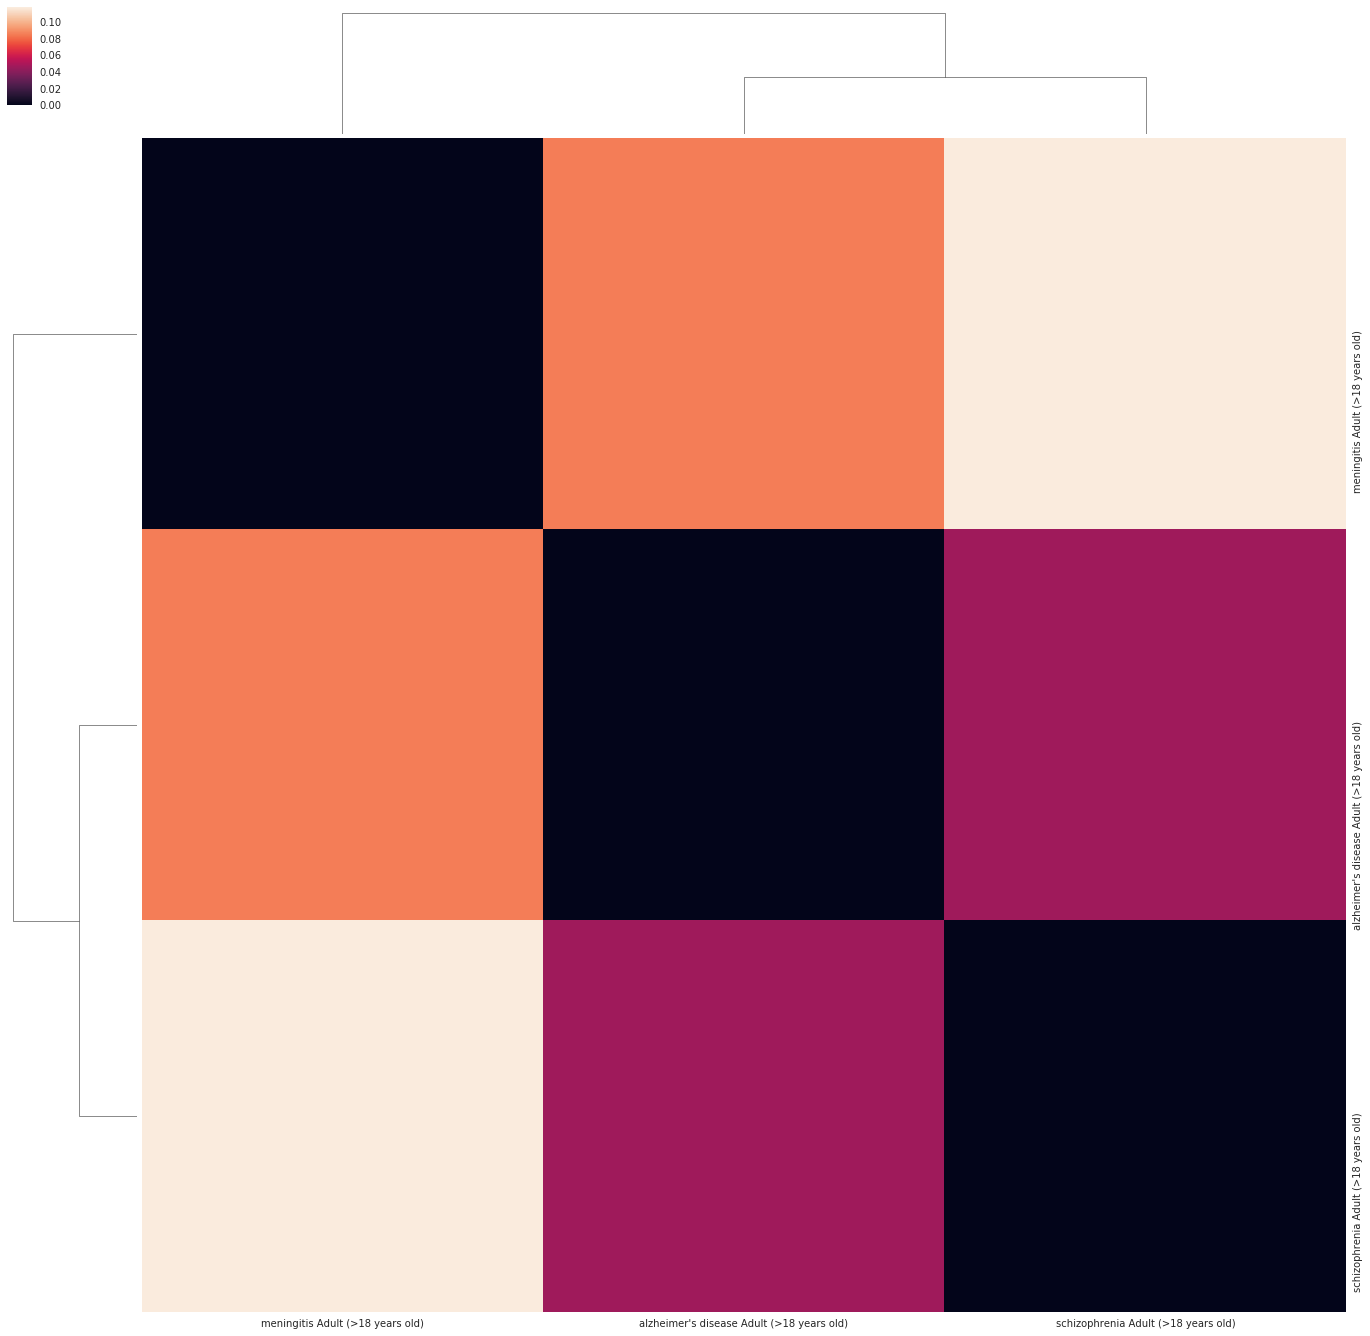

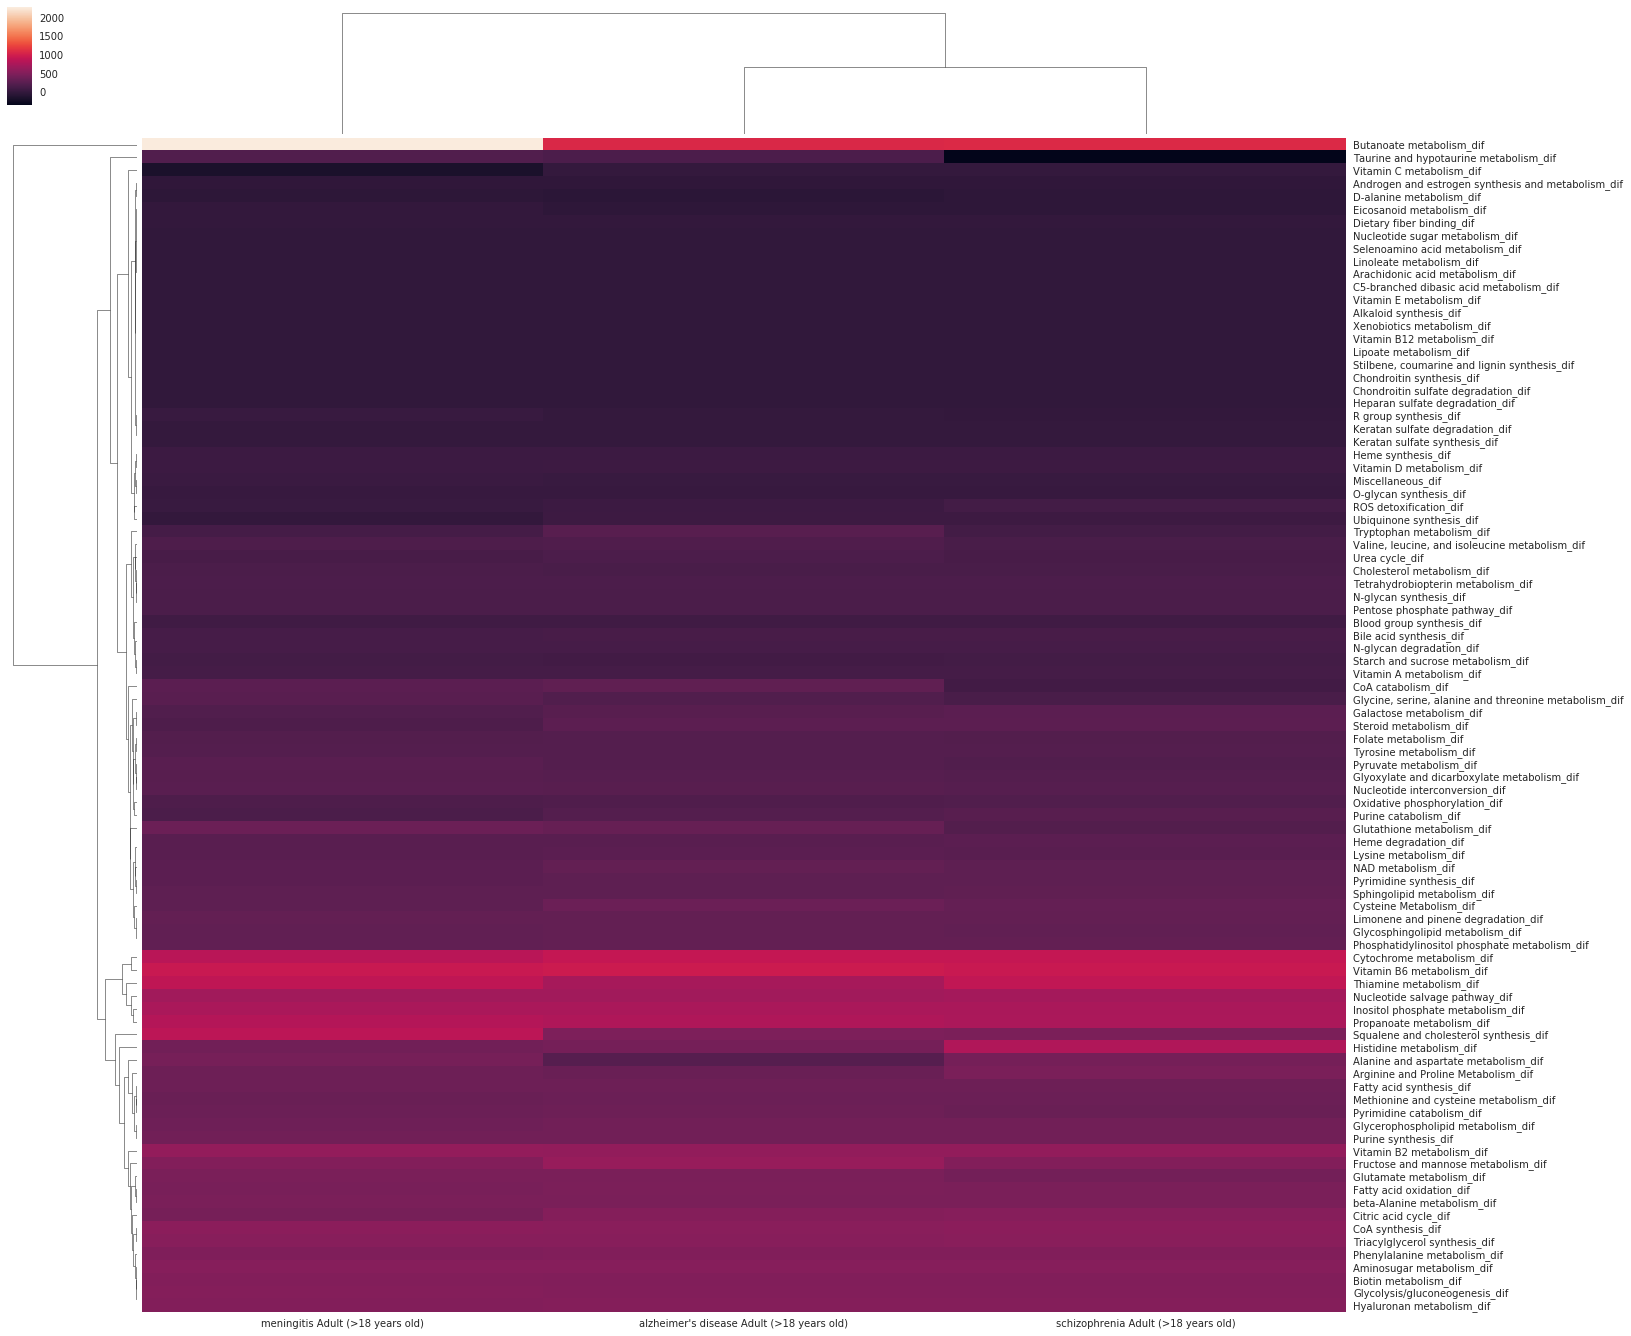

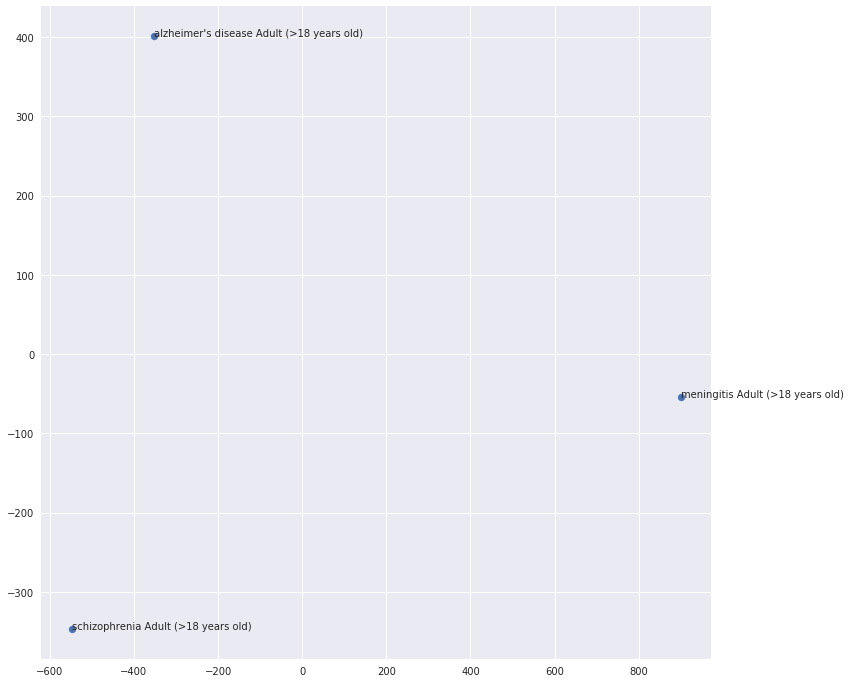

In [12]:
from IPython.display import display, HTML
from services import convert_df_to_squareform
from visualization import dendrogram, pca_map

for k, v in dfs_by_types.items():
    display(HTML('<br> <h1>%s</h1>' % k))
    display(v.round(3))
    
    df_squareform = convert_df_to_squareform(v)
    display(HTML('<h2>Square Form</h2>'))
    display(df_squareform)
    
    dendrogram(v)
    plt.show()
    
    sns.clustermap(df_squareform, figsize=(24, 24))
    plt.show()
    
    sns.clustermap(v, figsize=(24, 24))
    plt.show()
    
    pca_map(v)
    plt.show()